In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col='Unnamed: 0')
df.head()

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34545 entries, 49938 to 303778
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), int64(5), object(1)
memory usage: 94.6+ MB


In [31]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [32]:
df['_STATE'].unique() #find unique values

array([ 9., 34., 36.])

In [33]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [34]:
df["PHYSHLTH"].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [35]:
df['PHYSHLTH']


49938     88.0
49939     88.0
49940      2.0
49941     88.0
49942     88.0
          ... 
303774    88.0
303775    88.0
303776     6.0
303777    88.0
303778    88.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [37]:
df['PHYSHLTH'].replace(88.0, 0, inplace=True)
df['PHYSHLTH'].replace([77, 99], np.nan, inplace=True)


In [38]:
df['PHYSHLTH']  #Make sure the replace worked 

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [39]:
df.groupby('_STATE')['PHYSHLTH'].mean()  #find the mean by state so that the data remains true as possible 

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [40]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [41]:
# loop to go through the dataframe and replace the NONE in PHYSHLTH columns to the corresponding mean by state.
for ele in df['_STATE']:
    if ele == '9':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 3.697
    elif ele == '34':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 4.366
    elif ele == '36':
        if df['PHYSHLTH'][ele] is None:
            df['PHYSHLTH'][ele] = 4.145

In [ ]:
#the loop doesn't work

In [42]:
df['PHYSHLTH'].describe() #to get descriptive stats on the coloumn



count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

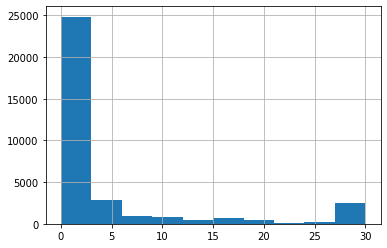

In [43]:
df['PHYSHLTH'].hist() #histogram to show the data 


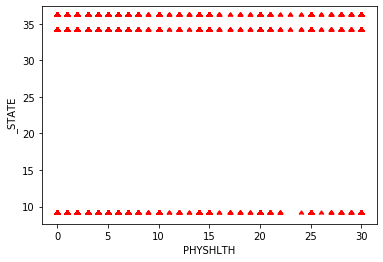

In [16]:
# y_val = df['_STATE'].value_counts()
# print(y_val.keys())
df.plot.scatter(x='PHYSHLTH',y='_STATE',marker = 10 , c ='r' )  #Scatter plot to show the data 


In [44]:
my_graph_state = df.groupby('_STATE')['PHYSHLTH'].mean() #groupby state

In [45]:
my_graph_state

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [46]:
df['PHYSHLTH'].head(10)

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
49943     0.0
49944     0.0
49945     0.0
49946    28.0
49947     0.0
Name: PHYSHLTH, dtype: float64

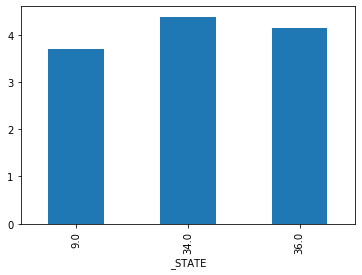

In [19]:
my_graph_state.plot(kind = 'bar')

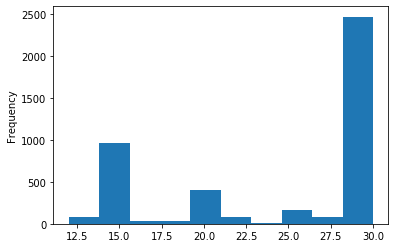

In [25]:
df['CHRNC_SCK'] = df['PHYSHLTH'][df['PHYSHLTH']>=12]
df['CHRNC_SCK'].plot(kind = 'hist')     #graph to show the chronically sick in PHYSHLTH colunms

KeyError: 'CHRNC_SCK'

In [26]:
df['CHRNC_SCK'].describe()

count    4318.000000
mean       24.710746
std         6.688955
min        12.000000
25%        18.000000
50%        30.000000
75%        30.000000
max        30.000000
Name: CHRNC_SCK, dtype: float64

In [27]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

49938     15.0
49939     15.0
49940     15.0
49941     15.0
49942     15.0
          ... 
303774    15.0
303775    15.0
303776    15.0
303777    15.0
303778    15.0
Name: CHRNC_SCK, Length: 34545, dtype: float64